In [37]:
import os
import json
import tqdm
import numpy as np
import pandas as pd
from PIL import Image
from IPython import display

In [2]:
json_path = '/data/PanoHeadData/single_view_hq/dataset_blur.json'
with open(json_path) as f:
    dataset = json.load(f)
print(f'Number of images: {len(dataset)}')

Number of images: 404524


In [19]:
lap_scores = []
svd_scores = []

for blur_meta in tqdm.tqdm(dataset.values()):
    lap_scores.append(blur_meta['laplacian_score'])
    svd_scores.append(blur_meta['svd_score'])

  0%|          | 0/404524 [00:00<?, ?it/s]

100%|██████████| 404524/404524 [00:00<00:00, 2363646.87it/s]


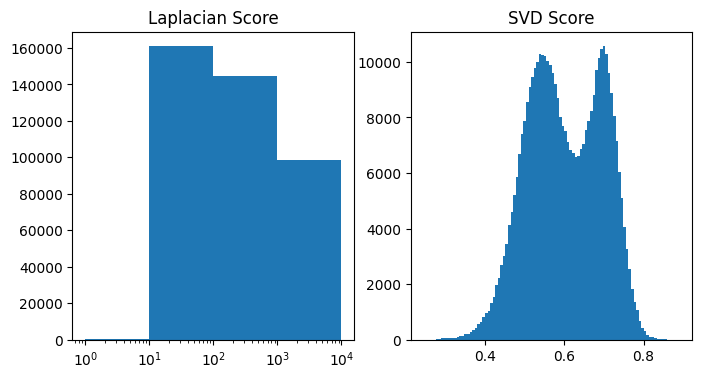

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.xscale('log')
plt.hist(lap_scores, bins=np.logspace(0, 4, 5))
plt.title('Laplacian Score')
plt.subplot(122)
plt.hist(svd_scores, bins=100)
plt.title('SVD Score')
plt.show()

In [20]:
lowest_lap = 100
hightest_lap = -1
lowest_lap_img, hightest_lap_img = None, None
for k, v in dataset.items():
    _lap_score = v['laplacian_score']
    if _lap_score < lowest_lap:
        lowest_lap = _lap_score
        lowest_lap_img = k
    if _lap_score > hightest_lap:
        hightest_lap = _lap_score
        hightest_lap_img = k
print(f'Lowest Laplacian Score: {lowest_lap}')
print(f'Hightest Laplacian Score: {hightest_lap}')
print(f'Lowest Laplacian Score Image: {lowest_lap_img}')
print(f'Hightest Laplacian Score Image: {hightest_lap_img}')

Lowest Laplacian Score: 1.4419768508123887
Hightest Laplacian Score: 14461.749168490449
Lowest Laplacian Score Image: 00073/img00073470.png
Hightest Laplacian Score Image: 00129/img00129574.png


In [64]:
image_path_scores = []
lb_svd = 0.76
hb_svd = 0.85
lb_lap = 10
hb_lap = 40
nums = 20
for k, v in tqdm.tqdm(dataset.items()):
    _lap_score = round(v['laplacian_score'])
    _svd_score = round(v['svd_score'], 2)
    if _lap_score >= lb_lap and _lap_score <= hb_lap:
        image_path_scores.append([os.path.join('/data/PanoHeadData/single_view_hq/align_images', f'{k[:-4]}.jpg'), _svd_score, _lap_score])
        if len(image_path_scores) >= nums:
            break
    # if _svd_score >= lb_svd and _svd_score <= hb_svd:
    #     image_path_scores.append([os.path.join('/data/PanoHeadData/single_view_hq/align_images', f'{k[:-4]}.jpg'), _svd_score, _lap_score])
    #     if len(image_path_scores) >= nums:
    #         break
df = pd.DataFrame(image_path_scores, columns=['image_path', 'svd_score', 'lap_score'])

  9%|▉         | 36025/404524 [00:00<00:00, 819013.51it/s]

                                           image_path  svd_score  lap_score
6   /data/PanoHeadData/single_view_hq/align_images...       0.81         16
11  /data/PanoHeadData/single_view_hq/align_images...       0.77         16
12  /data/PanoHeadData/single_view_hq/align_images...       0.77         11
14  /data/PanoHeadData/single_view_hq/align_images...       0.75         16
8   /data/PanoHeadData/single_view_hq/align_images...       0.75         15
5   /data/PanoHeadData/single_view_hq/align_images...       0.74         13
3   /data/PanoHeadData/single_view_hq/align_images...       0.73         30
18  /data/PanoHeadData/single_view_hq/align_images...       0.73         40
7   /data/PanoHeadData/single_view_hq/align_images...       0.71         38
2   /data/PanoHeadData/single_view_hq/align_images...       0.70         14


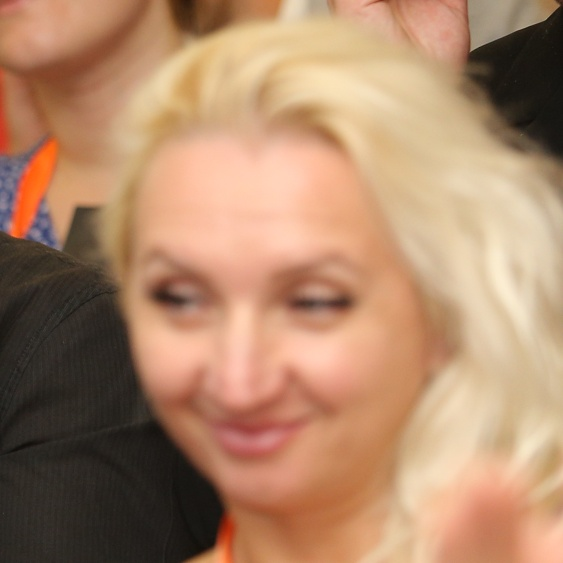

/data/PanoHeadData/single_view_hq/align_images/00009/img00009413.jpg 0.81 16


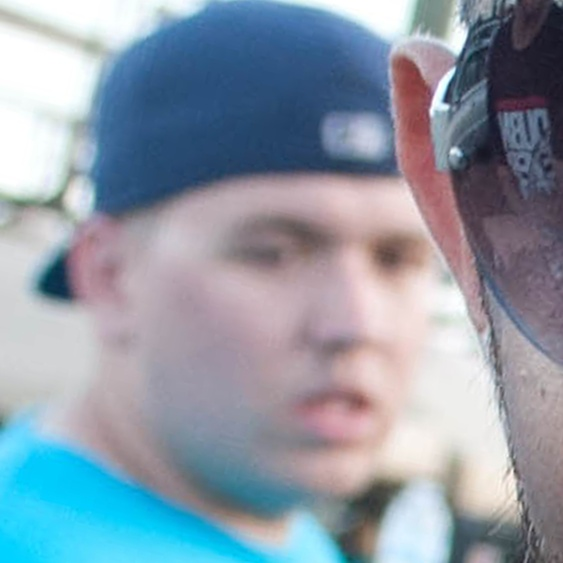

/data/PanoHeadData/single_view_hq/align_images/00018/img00018758.jpg 0.77 16


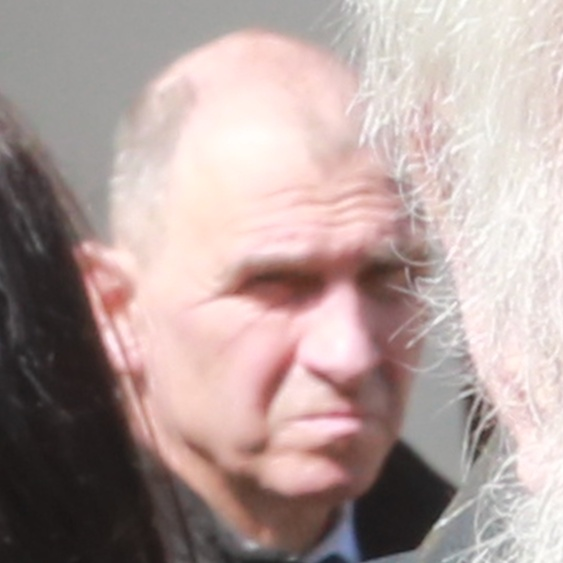

/data/PanoHeadData/single_view_hq/align_images/00018/img00018846.jpg 0.77 11


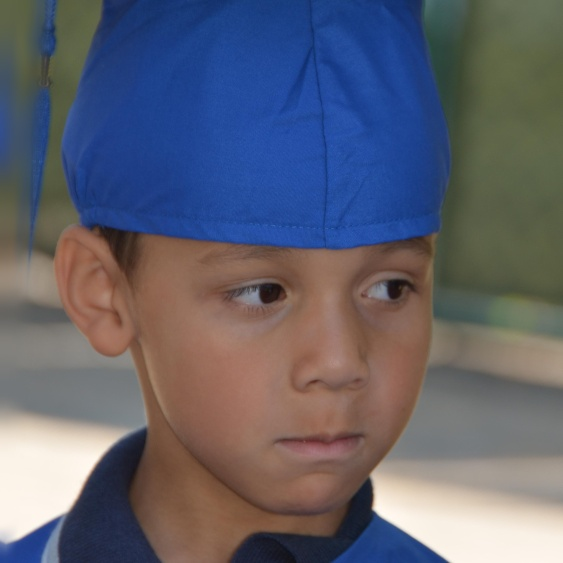

/data/PanoHeadData/single_view_hq/align_images/00027/img00027774.jpg 0.75 16


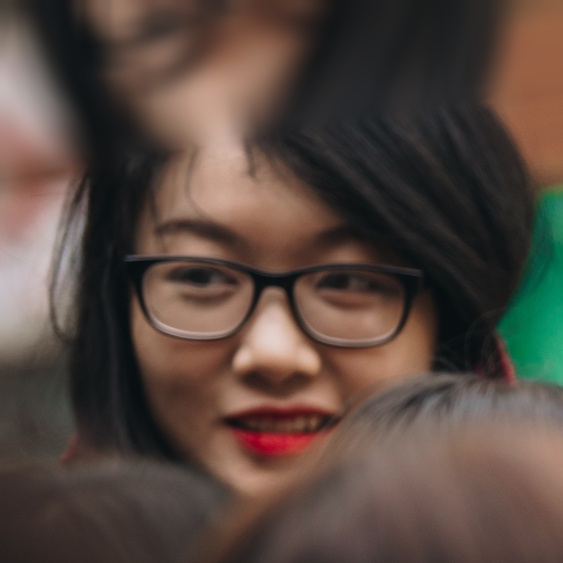

/data/PanoHeadData/single_view_hq/align_images/00010/img00010979.jpg 0.75 15


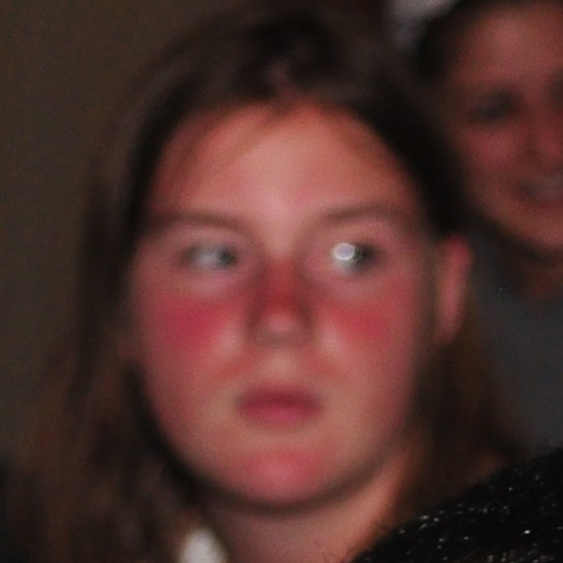

/data/PanoHeadData/single_view_hq/align_images/00008/img00008680.jpg 0.74 13


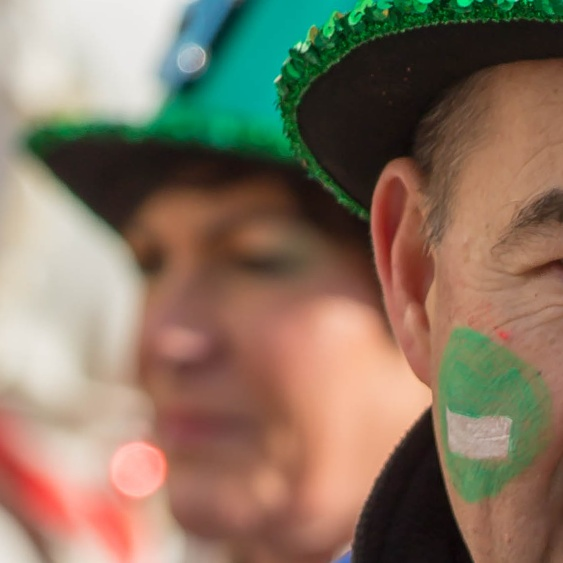

/data/PanoHeadData/single_view_hq/align_images/00005/img00005678.jpg 0.73 30


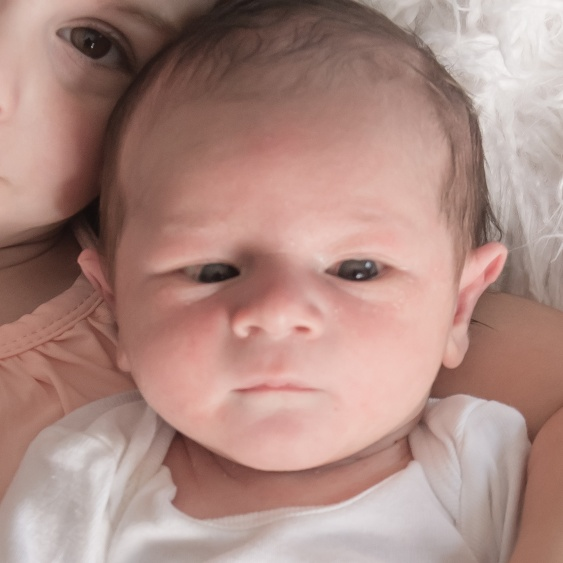

/data/PanoHeadData/single_view_hq/align_images/00034/img00034693.jpg 0.73 40


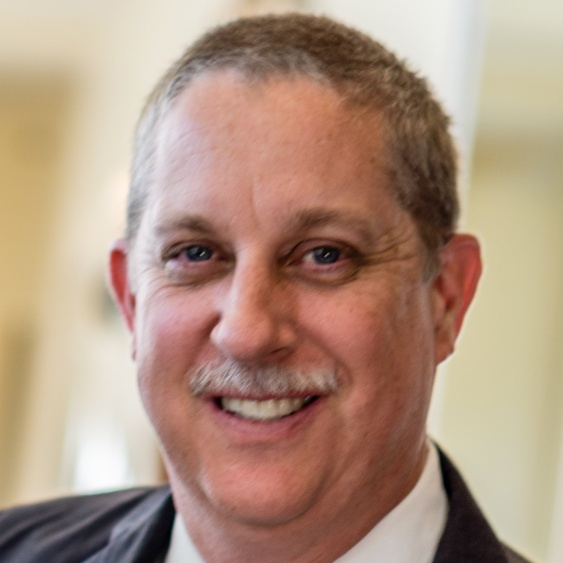

/data/PanoHeadData/single_view_hq/align_images/00010/img00010550.jpg 0.71 38


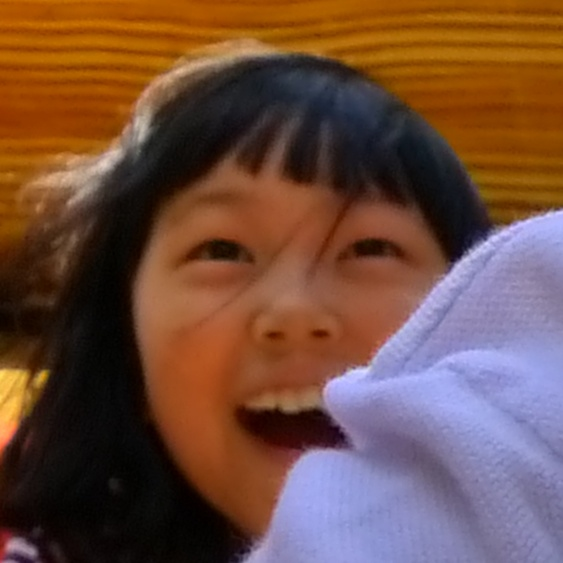

/data/PanoHeadData/single_view_hq/align_images/00004/img00004849.jpg 0.7 14


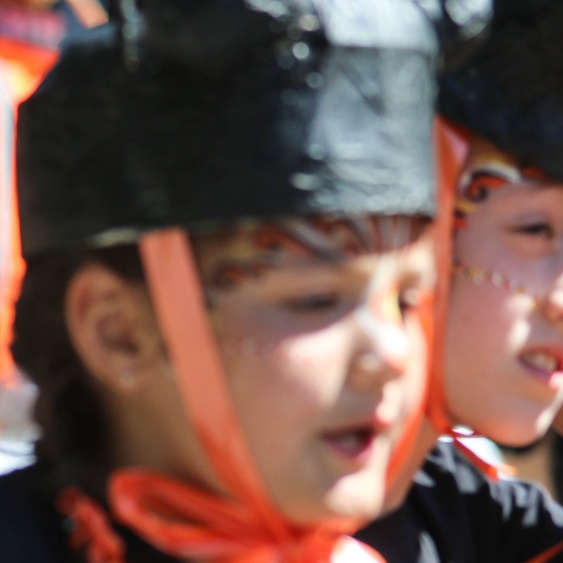

/data/PanoHeadData/single_view_hq/align_images/00036/img00036042.jpg 0.69 14


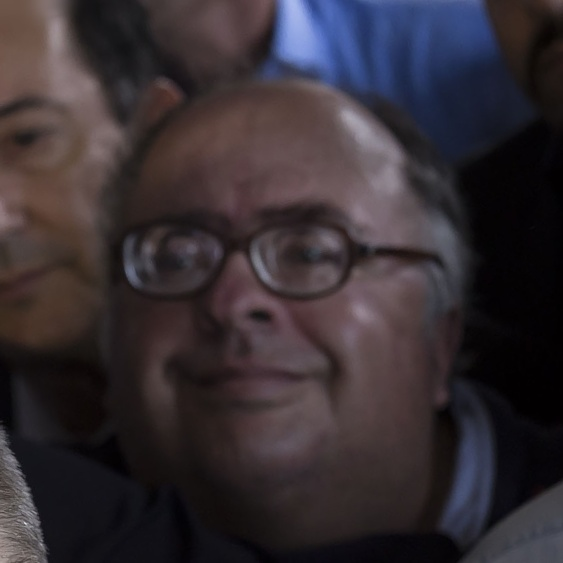

/data/PanoHeadData/single_view_hq/align_images/00034/img00034615.jpg 0.68 22


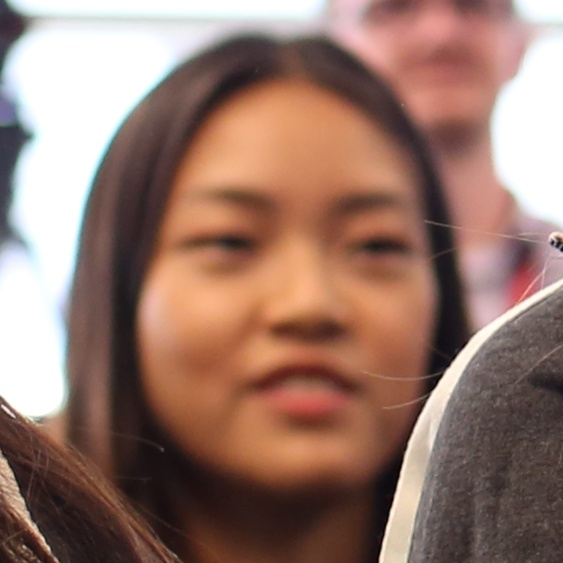

/data/PanoHeadData/single_view_hq/align_images/00029/img00029681.jpg 0.68 40


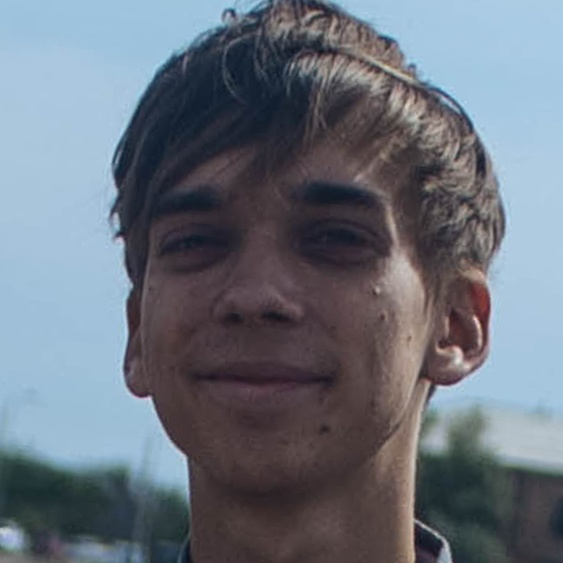

/data/PanoHeadData/single_view_hq/align_images/00029/img00029745.jpg 0.67 28


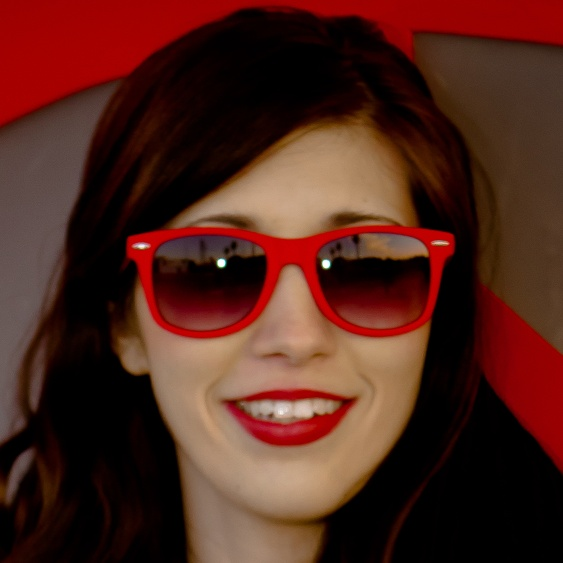

/data/PanoHeadData/single_view_hq/align_images/00003/img00003184.jpg 0.66 28


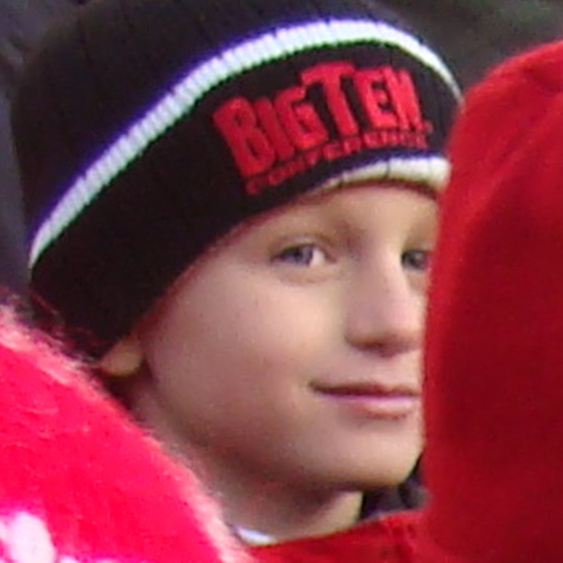

/data/PanoHeadData/single_view_hq/align_images/00005/img00005684.jpg 0.65 13


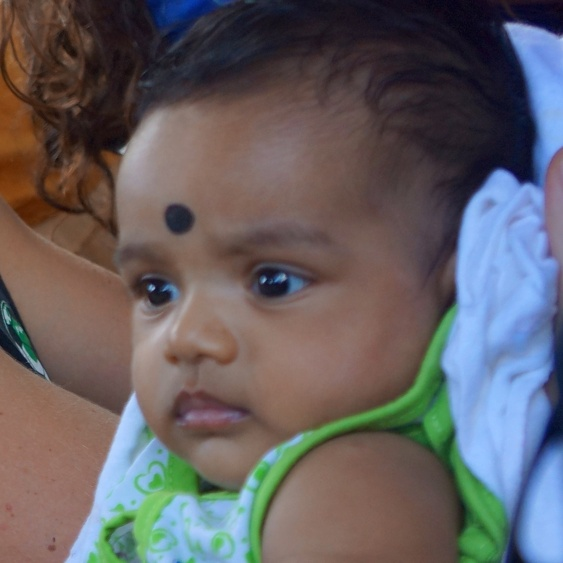

/data/PanoHeadData/single_view_hq/align_images/00017/img00017174.jpg 0.65 32


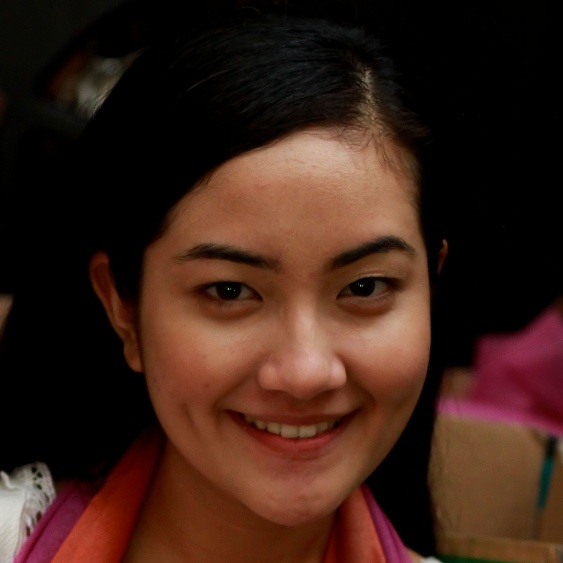

/data/PanoHeadData/single_view_hq/align_images/00027/img00027687.jpg 0.64 31


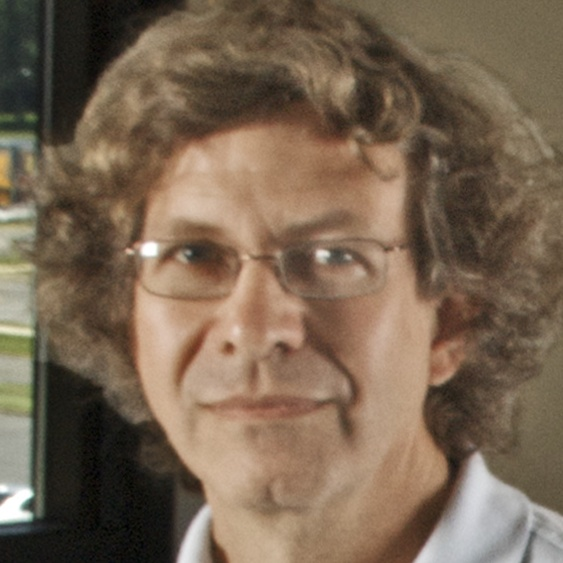

/data/PanoHeadData/single_view_hq/align_images/00004/img00004352.jpg 0.64 36


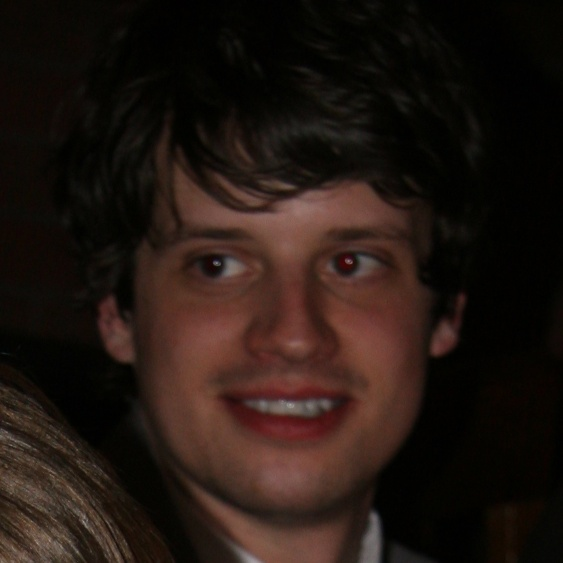

/data/PanoHeadData/single_view_hq/align_images/00011/img00011429.jpg 0.56 33


In [65]:
df = df.sort_values(by=['lap_score'], ascending=False)
# df = df.sort_values(by=['svd_score'], ascending=False)
print(df.head(10))
# display images
for i, row in df.iterrows():
    display.display(display.Image(row['image_path']))
    print(row['image_path'], row['svd_score'], row['lap_score'])